<a href="https://colab.research.google.com/github/Ethan-Peterson33/Data_lit_HW/blob/master/BTC_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

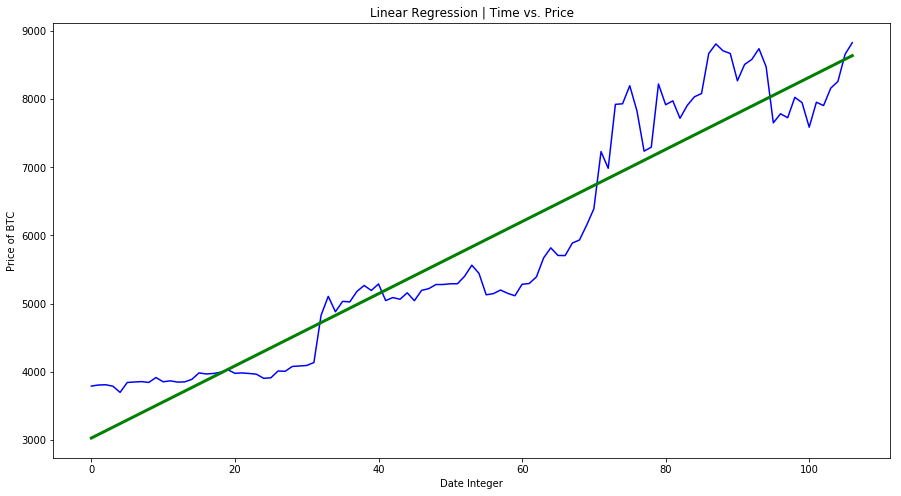

Accuracy Score for Standard Linear Regression 0.8977763767583699


In [27]:
!pip install quandl

#import Dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import quandl
import datetime
#style.use('ggplot')

#Define Dates
start_date = datetime.date(2019, 3, 1)
end_date = datetime.date.today()

#Input API KEY
quandl.ApiConfig.api_key = 'XE6RV-AUY5Z8ncD6xFUg'

#Extract Data from Quandl
data = quandl.get('BITSTAMP/USD', start_date=start_date, end_date=end_date)
data = data.reset_index()
prices = data['Last'].tolist()
dates = data.index.tolist()

#Covert to 1d Vector
dates = np.reshape(dates, (len(dates),1))
prices = np.reshape(prices, (len(prices),1))


#Initialize the Model and assign to variable
regressor = LinearRegression()
regressor.fit(dates, prices)
predicted = regressor.predict(dates)
score = regressor.score(dates, prices)

#Visualize the Results
plt.figure(figsize=(15,8)) 
plt.plot(dates, prices, color='blue', label='Acutal Price')
plt.plot(dates, predicted, color='green', linewidth=3, label='Predicted Price')
plt.title('Linear Regression | Time vs. Price')

plt.xlabel('Date Integer')
plt.ylabel('Price of BTC')
plt.show()

print('Accuracy Score for Standard Linear Regression', score)

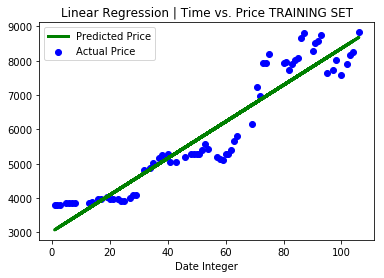

Accuracy score for training set 0.8949536209048906


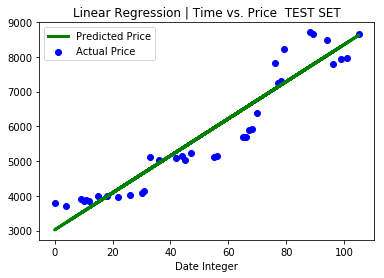

Accuracy score for test set 0.9024644938409301


In [28]:
#Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.33, random_state=42)
regressor.fit(xtrain, ytrain)

#Train Set Graph
plt.scatter(xtrain, ytrain, color='blue', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='green', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price TRAINING SET')
plt.legend()
plt.xlabel('Date Integer')
plt.show()
print('Accuracy score for training set',regressor.score(xtrain, ytrain))

#Test Set Graph
plt.scatter(xtest, ytest, color='blue', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='green', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price  TEST SET')
plt.legend()
plt.xlabel('Date Integer')
plt.show()
print('Accuracy score for test set', regressor.score(xtest, ytest))

In [29]:
#Make a Prediction for a Year from now
year_from_now = regressor.predict([[1863+365]])
print('According to the Linear Regression Model the Price of BTC will be', int(year_from_now[0][0]), "in one year.")

According to the Linear Regression Model the Price of BTC will be 121984 in one year.


# Lets Try Some Other Models To See Some Other Possibilities and Possibly Better Predictions 
- ## BTC Hasn't really followed a linear Path


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


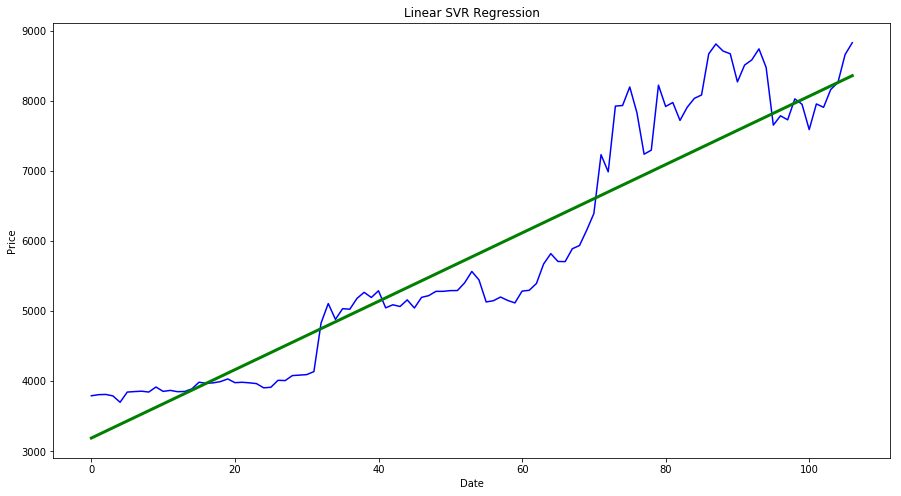

Accuracy Score for linear SVR model 0.891016898795962
According to the Linear Support Vector Regression Model the Price of BTC will be 111841 in one year.


In [30]:
from sklearn.svm import SVR

#initialize the SVR models with different kernels
svr_lin = SVR(kernel = 'linear', C=1e3)
svr_poly = SVR(kernel = 'poly', C=1e2, degree =2) 
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma=0.1)

#fit the linear model
svr_lin.fit(dates,prices)

#plot the results
plt.figure(figsize=(15,8))
plt.plot(dates, prices, color='blue', label='Acutal Price')
plt.plot(dates, svr_lin.predict(dates), color='green', linewidth=3, label='Linear SVR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear SVR Regression')
plt.show()

predicted = svr_lin.predict(dates)
score = svr_lin.score(dates, prices)
 
#make a prediction for a year from now
year_from_now = svr_lin.predict([[1863+365]])
print("Accuracy Score for linear SVR model", score)
print('According to the Linear Support Vector Regression Model the Price of BTC will be', int(year_from_now), "in one year.")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


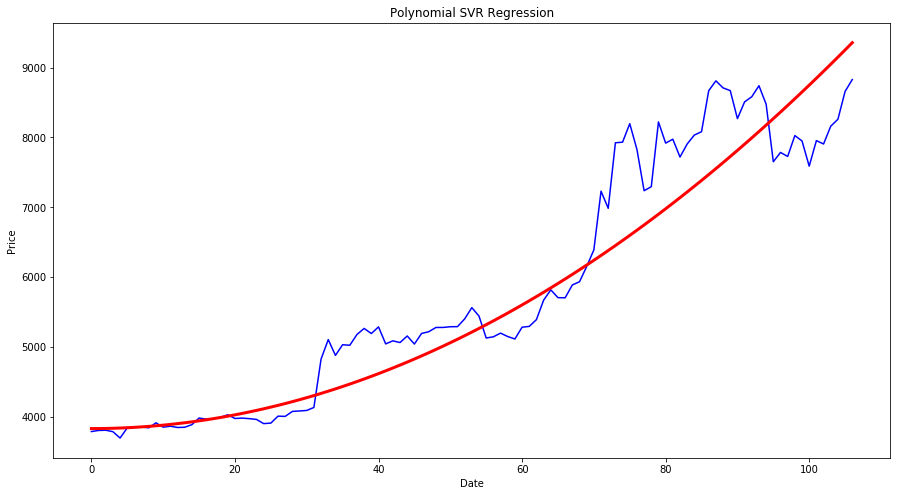

In [35]:
#fit the Polynomial model
svr_poly.fit(dates,prices)

#plot the results
plt.figure(figsize=(15,8))
plt.plot(dates, prices, color='blue', label='Acutal Price')
plt.plot(dates, svr_poly.predict(dates), color='red', linewidth=3, label='Polynomial SVR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Polynomial SVR Regression')


predicted = svr_poly.predict(dates)
score = svr_poly.score(dates, prices)

#make a prediction for a year from now
year_from_now = svr_poly.predict([[1863+365]])



In [36]:
print("Accuracy Score for Polynomial SVR model", score)
print('According to the Polynomial Support Vector Regression Model the Price of BTC will be', int(year_from_now), "in one year.")

Accuracy Score for Polynomial SVR model 0.8900723021317294
According to the Polynomial Support Vector Regression Model the Price of BTC will be 2443382 in one year.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


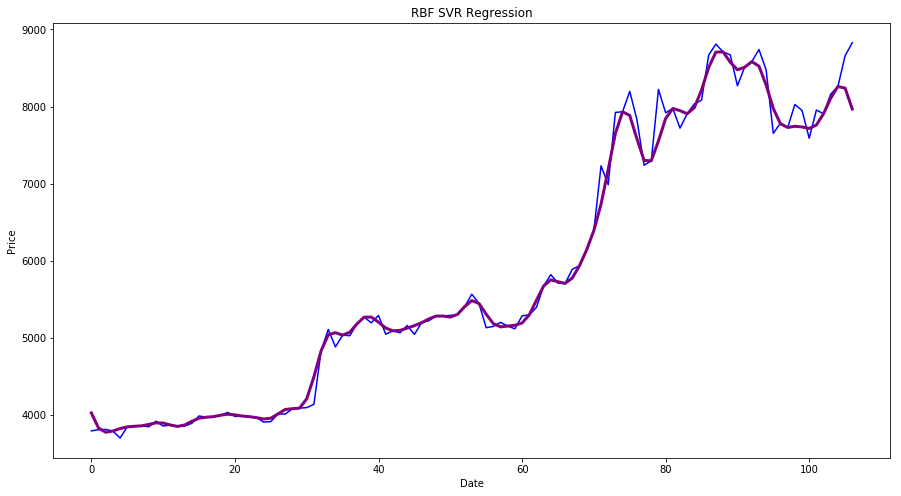

In [39]:
#fit the RBF model
svr_rbf.fit(dates,prices)

#plot the results
plt.figure(figsize=(15,8))
plt.plot(dates, prices, color='blue', label='Acutal Price')
plt.plot(dates, svr_rbf.predict(dates), color='purple', linewidth=3, label='RBF SVR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('RBF SVR Regression')


predicted = svr_rbf.predict(dates)
score = svr_rbf.score(dates, prices)

#make a prediction for a year from now
year_from_now = svr_rbf.predict([[1863+365]])


In [38]:
print("Accuracy Score for RBF SVR model", score)
print('According to the RBF Support Vector Regression Model the Price of BTC will be', int(year_from_now), "in one year.","   Ouch! Say it ain't so! Something isn't right here. ")

Accuracy Score for RBF SVR model 0.9911779547368296
According to the RBF Support Vector Regression Model the Price of BTC will be 5815 in one year.    Ouch! Say it ain't so! Something isn't right here. 
